<a href="https://colab.research.google.com/github/dldisha/TSS21_Machine_Learning/blob/main/Hw2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Linear regression on the Advertising data
=====================================================

**TODO**: Edit this cell to fill in your NYU Net ID and your name:

-   **Net ID**: 
-   **Name**:

To illustrate principles of linear regression, we are going to use some
data from the textbook “An Introduction to Statistical Learning
withApplications in R” (Gareth James, Daniela Witten, Trevor Hastie,
Robert Tibshirani) (available via NYU Library).

The dataset is described as follows:

> Suppose that we are statistical consultants hired by a client to
> provide advice on how to improve sales of a particular product. The
> `Advertising` data set consists of the sales of that product in 200
> different markets, along with advertising budgets for the product in
> each of those markets for three different media: TV, radio, and
> newspaper.
>
> …
>
> It is not possible for our client to directly increase sales of the
> product. On the other hand, they can control the advertising
> expenditure in each of the three media. Therefore, if we determine
> that there is an association between advertising and sales, then we
> can instruct our client to adjust advertising budgets, thereby
> indirectly increasing sales. In other words, our goal is to develop an
> accurate model that can be used to predict sales on the basis of the
> three media budgets.

Sales are reported in thousands of units, and TV, radio, and newspaper
budgets, are reported in thousands of dollars.

For this assignment, you will fit a linear regression model to a small
dataset. You will iteratively improve your linear regression model by
examining the residuals at each stage, in order to identify problems
with the model.

Make sure to include your name and net ID in a text cell at the top of
the notebook.

In [19]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 1. Read in and pre-process data

In this section, you will read in the “Advertising” data, and make sure
it is loaded correctly. Visually inspect the data using a pairplot, and
note any meaningful observations. In particular, comment on which
features appear to be correlated with product sales, and which features
appear to be correlated with one another. Then, split the data into
training data (70%) and test data (30%).

**The code in this section is provided for you**. However, you should
add a text cell at the end of this section, in which you write your
comments and observations.

#### Read in data

In [3]:
url = 'https://www.statlearning.com/s/Advertising.csv'
df  = pd.read_csv(url, index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Note that in this dataset, the first column in the data file is the row
label; that’s why we use `index_col=0` in the `read_csv` command. If we
would omit that argument, then we would have an additional (unnamed)
column in the dataset, containing the row number.

(You can try removing the `index_col` argument and re-running the cell
above, to see the effect and to understand why we used this argument.)

#### Visually inspect the data

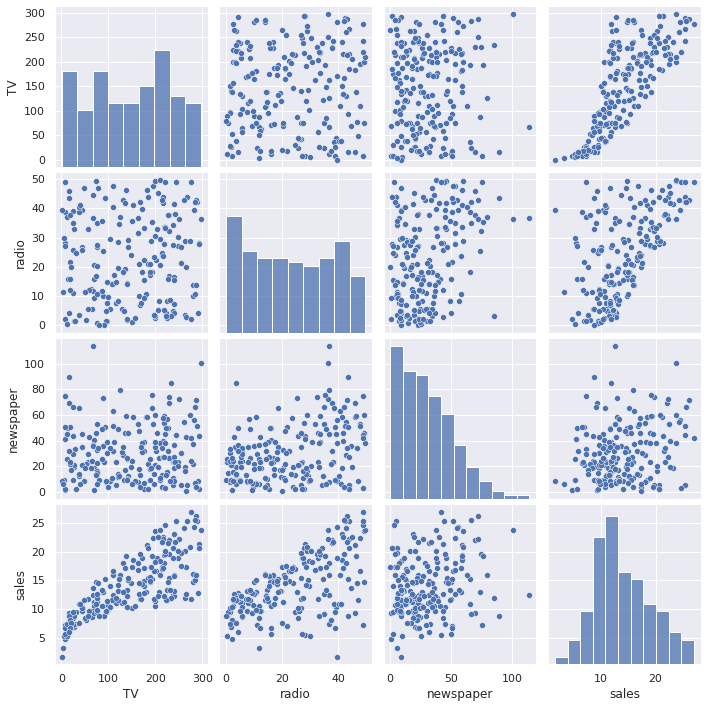

In [4]:
sns.pairplot(df);

The most important panels here are on the bottom row, where `sales` is
on the vertical axis and the advertising budgets are on the horizontal
axes.

**Observations from the pairplot:**

* Budget for different media can be listed as: Radio<Newspaper<TV.
*  TV is prefered by the majority of the population therefore its budget can be seen increasing and so are the sales. That is, TV and sales have a positive linear relationship
*  Sales for newspaper didn't rise much as the budget increased which means its common to have a small budget for newspaper. 
* Radio Vs Sales also hold linear pattern to some extent. This means radio can increase sales if we plan to increase its budget. 


#### Split up data

We will use 70% of the data for training and the remaining 30% to test
the regression model.

In [5]:
train, test = train_test_split(df, test_size=0.3)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 35 to 89
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         140 non-null    float64
 1   radio      140 non-null    float64
 2   newspaper  140 non-null    float64
 3   sales      140 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 170 to 176
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         60 non-null     float64
 1   radio      60 non-null     float64
 2   newspaper  60 non-null     float64
 3   sales      60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


### 2. Fit simple linear regression models

Use the training data to fit a simple linear regression to predict
product sales, for each of three features: TV ad budget, radio ad
budget, and newspaper ad budget. In other words, you will fit *three*
regression models, with each model being trained on one feature. For
each of the three regression models, create a plot of the training data
and the regression line, with product sales ($y$) on the vertical axis
and the feature on which the model was trained ($x$) on the horizontal
axis.

Also, for each regression model, print the intercept and coefficients,
and compute the MSE and R2 on the training data, and MSE and R2 on the
test data.

Comment on the results. Which type of ads seems to have the greatest
association with increased product sales? Which regression model is most
effective at predicting product sales?

**The code in this section is provided for you**. However, you should
add text cells in which you write your comments, observations, and
answers to the questions.

#### Fit a simple linear regression

In [8]:
reg_tv    = LinearRegression().fit(train[['TV']], train['sales'])
reg_radio = LinearRegression().fit(train[['radio']], train['sales'])
reg_news  = LinearRegression().fit(train[['newspaper']], train['sales'])

#### Look at coefficients

In [9]:
print("TV       : ", reg_tv.coef_[0], reg_tv.intercept_)
print("Radio    : ", reg_radio.coef_[0], reg_radio.intercept_)
print("Newspaper: ", reg_news.coef_[0], reg_news.intercept_)

TV       :  0.046777352286850746 6.9498675340147935
Radio    :  0.21477386371564489 9.060202781514022
Newspaper:  0.06377426794175627 11.911559107400304


#### Plot data and regression line

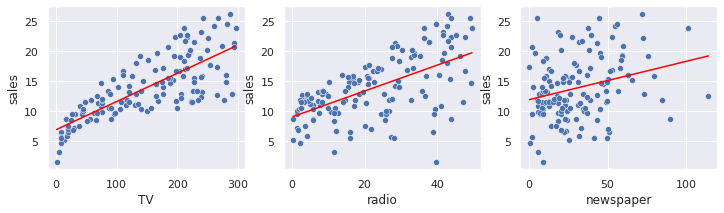

In [10]:
fig = plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
sns.scatterplot(data=train, x="TV", y="sales");
sns.lineplot(data=train, x="TV", y=reg_tv.predict(train[['TV']]), color='red');

plt.subplot(1,3,2)
sns.scatterplot(data=train, x="radio", y="sales");
sns.lineplot(data=train, x="radio", y=reg_radio.predict(train[['radio']]), color='red');

plt.subplot(1,3,3)
sns.scatterplot(data=train, x="newspaper", y="sales");
sns.lineplot(data=train, x="newspaper", y=reg_news.predict(train[['newspaper']]), color='red');

#### Compute R2, MSE for simple regression

In [11]:
y_pred_tr_tv    = reg_tv.predict(train[['TV']])
y_pred_tr_radio = reg_radio.predict(train[['radio']])
y_pred_tr_news  = reg_news.predict(train[['newspaper']])

In [12]:
r2_tr_tv    = metrics.r2_score(train['sales'], y_pred_tr_tv)
r2_tr_radio = metrics.r2_score(train['sales'], y_pred_tr_radio)
r2_tr_news  = metrics.r2_score(train['sales'], y_pred_tr_news)
print("TV       : ", r2_tr_tv)
print("Radio    : ", r2_tr_radio)
print("Newspaper: ", r2_tr_news)

TV       :  0.6029607413666136
Radio    :  0.3631782731556823
Newspaper:  0.0745323429970397


In [13]:
mse_tr_tv    = metrics.mean_squared_error(train['sales'], y_pred_tr_tv)
mse_tr_radio = metrics.mean_squared_error(train['sales'], y_pred_tr_radio)
mse_tr_news  = metrics.mean_squared_error(train['sales'], y_pred_tr_news)
print("TV       : ", mse_tr_tv)
print("Radio    : ", mse_tr_radio)
print("Newspaper: ", mse_tr_news)

TV       :  10.54009160800228
Radio    :  16.905530606743127
Newspaper:  24.56813444249715


In [14]:
y_pred_ts_tv    = reg_tv.predict(test[['TV']])
y_pred_ts_radio = reg_radio.predict(test[['radio']])
y_pred_ts_news  = reg_news.predict(test[['newspaper']])

In [15]:
r2_ts_tv    = metrics.r2_score(test['sales'], y_pred_ts_tv)
r2_ts_radio = metrics.r2_score(test['sales'], y_pred_ts_radio)
r2_ts_news  = metrics.r2_score(test['sales'], y_pred_ts_news)
print("TV       : ", r2_ts_tv)
print("Radio    : ", r2_ts_radio)
print("Newspaper: ", r2_ts_news)

TV       :  0.6230513079360909
Radio    :  0.25327427893235765
Newspaper:  -0.013584607161446938


In [16]:
mse_ts_tv    = metrics.mean_squared_error(test['sales'], y_pred_ts_tv)
mse_ts_radio = metrics.mean_squared_error(test['sales'], y_pred_ts_radio)
mse_ts_news  = metrics.mean_squared_error(test['sales'], y_pred_ts_news)
print("TV       : ", mse_ts_tv)
print("Radio    : ", mse_ts_radio)
print("Newspaper: ", mse_ts_news)

TV       :  10.588660481146036
Radio    :  20.975865679840783
Newspaper:  28.47205335926386


**Observations from Regression plots:**


*   TV ads seems to have the greatest association with increased product sales. Tv vs sales hold a positive linear relationship.
*   TV regression model has been the most effective in predicting the sales. This can also be seen in the graph and in the R2 value which is 63% for the traing data and 56% for the test data which means our model performed resonably well in both training and test data. 
* Newspaper vs sales holds the worst case for predicting the sales. Does not hold a linear relationship at all.



### 3. Explore the residuals for the single linear regression models

We know that computing MSE or R2 is not sufficient to diagnose a problem
with a linear regression.

Create some additional plots as described below to help you identify any
problems with the regression. Use training data for all of the items
below.

For each of the three regression models,

-   Plot predicted sales ($\hat{y}$) on the vertical axis, and actual
    sales ($y$) on the horizontal axis. Make sure both axes use the same
    scale. Comment on your observations. What would you expect this plot
    to look like for a model that explains the data well?
-   Compute the residuals ($y - \hat{y}$). Note that some of these will
    be negative, and some will be positive. What is the mean residual
    for each of the regression models? What *should* be the mean
    residual for a fitted linear regression model? Explain your answer.
-   Plot the residuals ($y - \hat{y}$) on the vertical axis, and actual
    sales ($y$) on the horizontal axis. Use the same scale for all three
    subplots. Comment on your observations. Is there a pattern in the
    residuals (and if so, what might it indicate), or do they appear to
    have no pattern with respect to actual sales?
-   For each of the three regression models AND each of the three
    features, plot the residuals ($y - \hat{y}$) on the vertical axis,
    and the feature ($x$) on the horizontal axis. This plot will include
    nine subplots in total. Make sure to clearly label each axis, and
    also label each subplot with a title that indicates which regression
    model it uses. Is there a pattern in the residuals (and if so, what
    might it indicate), or do they appear to have no pattern with
    respect to each of the three features?

**The code in this section is not provided for you**. You will need to
write code, in addition to the text cells in which you write your
comments, observations, and answers to the questions.

Text(0.5, 1.0, 'Actual vs Predicted TV sales(Training set)')

Text(0.5, 0, 'Actual Sales $y _i$')

Text(0, 0.5, 'Predicted Sales $\\hat y _i$')

Text(0.5, 1.0, 'Actual vs Predicted Radio Sales(Training set)')

Text(0.5, 0, 'Actual Sales $y _i$')

Text(0, 0.5, 'Predicted Sales $\\hat y _i$')

Text(0.5, 1.0, 'Actual vs Predicted Newspaper Sales(Training set)')

Text(0.5, 0, 'Actual Sales $y _i$')

Text(0, 0.5, 'Predicted Sales $\\hat y _i$')

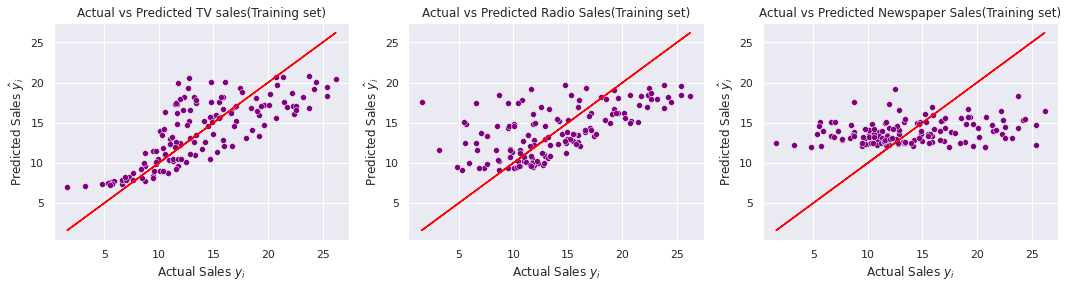

In [20]:
#Linear regression
#actual sales vs predicted sales plot

fig = plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.scatterplot(train['sales'], y_pred_tr_tv, color = 'purple')
plt.plot(train['sales'], train['sales'], color = 'red')
plt.title('Actual vs Predicted TV sales(Training set)')
plt.xlabel('Actual Sales $y _i$')
plt.ylabel('Predicted Sales $\hat y _i$')

plt.subplot(1,3,2)
sns.scatterplot(train['sales'], y_pred_tr_radio, color = 'purple')
plt.plot(train['sales'], train['sales'], color = 'red')
plt.title('Actual vs Predicted Radio Sales(Training set)')
plt.xlabel('Actual Sales $y _i$')
plt.ylabel('Predicted Sales $\hat y _i$')

plt.subplot(1,3,3)
sns.scatterplot(train['sales'], y_pred_tr_news, color = 'purple')
plt.plot(train['sales'], train['sales'], color = 'red')
plt.title('Actual vs Predicted Newspaper Sales(Training set)')
plt.xlabel('Actual Sales $y _i$')
plt.ylabel('Predicted Sales $\hat y _i$')

**Observations from Actual vs Predicted graph :**

*   TV plot have a linear pattern. A good pattern can be seen when actual vales ranged from above than 5 to less than 15. 
*   Newspaper plot underestimates the actual values to a very large extent. It holds a systematic pattern but it isn't linear. Predicted values are same throughout the plot irrespective of the actual values. 

For a model to explain data well I would expect that predicted values are equal to actual values to some extent. Which means a high R2 value.  



In [47]:
#Compute residuals
y = train['sales']
#TV
residual_tv = y - y_pred_tr_tv
print("TV Residual Values: \n", residual_tv)
tv_mean = np.mean(residual_tv)
print("TV Mean Value: ", tv_mean, "\n")

#radio
residual_radio = y - y_pred_tr_radio
print("Radio Residual Values \n", residual_radio)
radio_mean = np.mean(residual_radio)
print("Radio Mean Value: ", radio_mean, "\n")

#newspaper
residual_news = y - y_pred_tr_news
print("Newspaper Residual Values \n", residual_news)
news_mean = np.mean(residual_news)
print("Newspaer Mean Value: ", news_mean, "\n")



TV Residual Values: 
 35    -1.926460
142    3.189359
23    -1.967329
92    -0.987700
32    -0.331031
         ...   
85     4.763168
155   -0.134654
169    0.074291
98    -0.099000
89     1.819692
Name: sales, Length: 140, dtype: float64
TV Mean Value:  2.816794416763254e-15 

Radio Residual Values 
 35     0.139114
142    2.536802
23    -6.875107
92    -2.082364
32    -0.897268
         ...   
85     3.404521
155    2.008069
169    2.971134
98     1.929546
89    -1.636936
Name: sales, Length: 140, dtype: float64
Radio Mean Value:  1.928615997063129e-15 

Newspaper Residual Values 
 35    -2.883489
142    2.467106
23    -9.474763
92    -6.716110
32    -2.473246
         ...   
85     7.632871
155    3.082585
169    1.515043
98     2.185407
89    -3.692590
Name: sales, Length: 140, dtype: float64
Newspaer Mean Value:  1.1926967350258824e-15 



**Observations from the mean residuals:**

I would expect mean for a fitted linear regression model to be equal to zero. Which means both the sum of the mean and all values of residuals to be equal to zero.

Newspaper sales have the least mean residual of all the other ads. 



Text(0.5, 1.0, 'Actual vs Residual TV sales(Training set)')

Text(0.5, 0, 'Actual Sales $y _i$')

Text(0, 0.5, 'Residual $y _i$ - $\\hat y _i$')

Text(0.5, 1.0, 'Actual vs Residual Radio sales(Training set)')

Text(0.5, 0, 'Actual Sales $y _i$')

Text(0, 0.5, 'Residual $y _i$ - $\\hat y _i$')

Text(0.5, 1.0, 'Actual vs Residual Newspaper sales(Training set)')

Text(0.5, 0, 'Actual Sales $y _i$')

Text(0, 0.5, 'Residual $y _i$ - $\\hat y _i$')

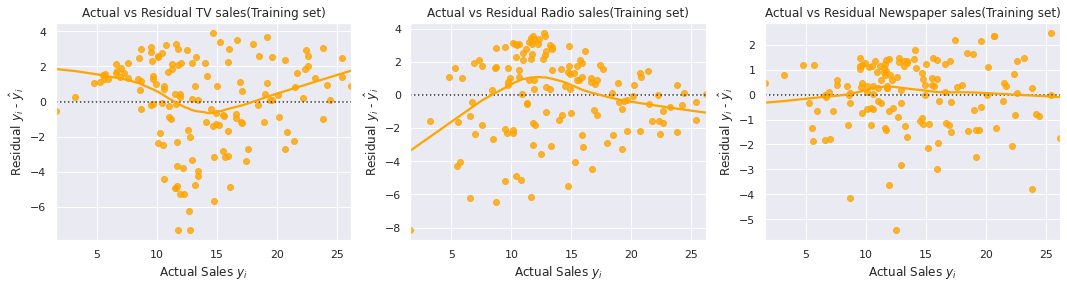

In [26]:
#Residuals (y - yhat) vs Actual Value plot

fig = plt.figure(figsize=(18,4))

#TV
plt.subplot(1,3,1)
sns.residplot(x=train['sales'], y=residual_tv, lowess=True, color='orange')
plt.title('Actual vs Residual TV sales(Training set)')
plt.xlabel('Actual Sales $y _i$')
plt.ylabel('Residual $y _i$ - $\hat y _i$')

#Radio
plt.subplot(1,3,2)
sns.residplot(x=train['sales'], y=residual_radio, lowess=True, color='orange')
plt.title('Actual vs Residual Radio sales(Training set)')
plt.xlabel('Actual Sales $y _i$')
plt.ylabel('Residual $y _i$ - $\hat y _i$')

#News
plt.subplot(1,3,3)
sns.residplot(x=train['sales'], y=residual_news, lowess=True, color='orange')
plt.title('Actual vs Residual Newspaper sales(Training set)')
plt.xlabel('Actual Sales $y _i$')
plt.ylabel('Residual $y _i$ - $\hat y _i$')

**Observations from the residual vs actual sales plot:**


For TV sales:

*   There is no pattern
*   The plot is unbiased
*   Linear regression seems okay.

For Radio Sales:

*   There is a pattern
*   The plot is unbiased intially but after actual sales range from 15 the residual gets biased and has a pattern
*   Values after 15 are same across the x-axis. They have been showing a decresing trend

For the Newspaper Sales:

*   There is a pattern
*   The plot is biased.
*   Values across the x-axis are same. There is a constant variance.
*   Linear regression is not okay.





Text(0, 0.5, 'TV Residuals')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0, 0.5, 'Radio Residuals')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0, 0.5, 'Newspaper Residuals')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

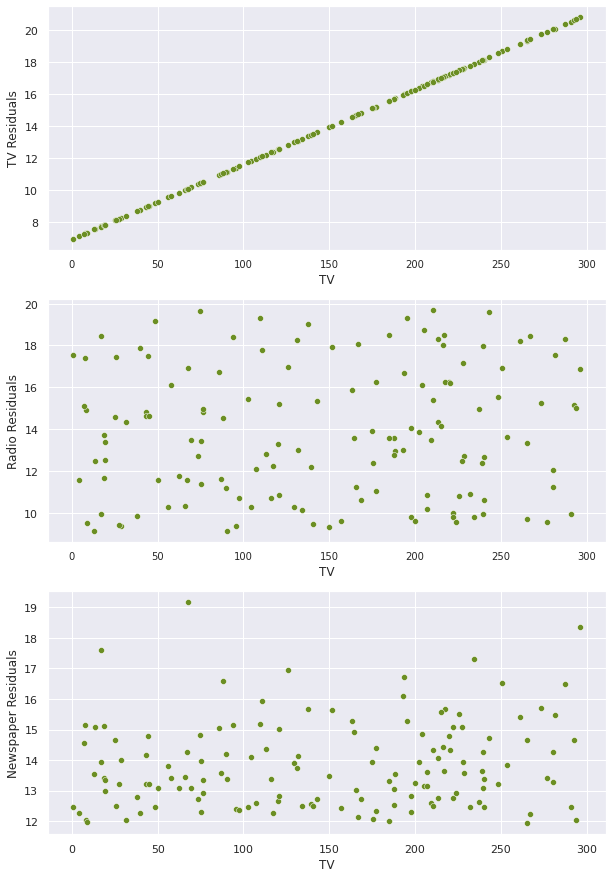

In [48]:
#Residuals vs TV feature

x1 = train['TV']
fig = plt.figure(figsize=(10,4))

ax1 = plt.subplot(311)
ax1 = sns.scatterplot(x1, y_pred_tr_tv, color='olivedrab')
plt.ylabel("TV Residuals")
plt.setp(ax1.get_xticklabels(), fontsize=10)

ax2 = plt.subplot(312)
ax2 = sns.scatterplot(x1, y_pred_tr_radio, color='olivedrab')
plt.ylabel("Radio Residuals")
plt.setp(ax2.get_xticklabels(), fontsize=10)

ax3 = plt.subplot(313)
ax3 = sns.scatterplot(x1, y_pred_tr_news, color='olivedrab')
plt.ylabel("Newspaper Residuals")
plt.setp(ax2.get_xticklabels(), fontsize=10)

fig.subplots_adjust(top=3)
plt.show()

Text(0, 0.5, 'TV Residuals')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0, 0.5, 'Radio Residuals')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0, 0.5, 'Newspaper Residuals')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

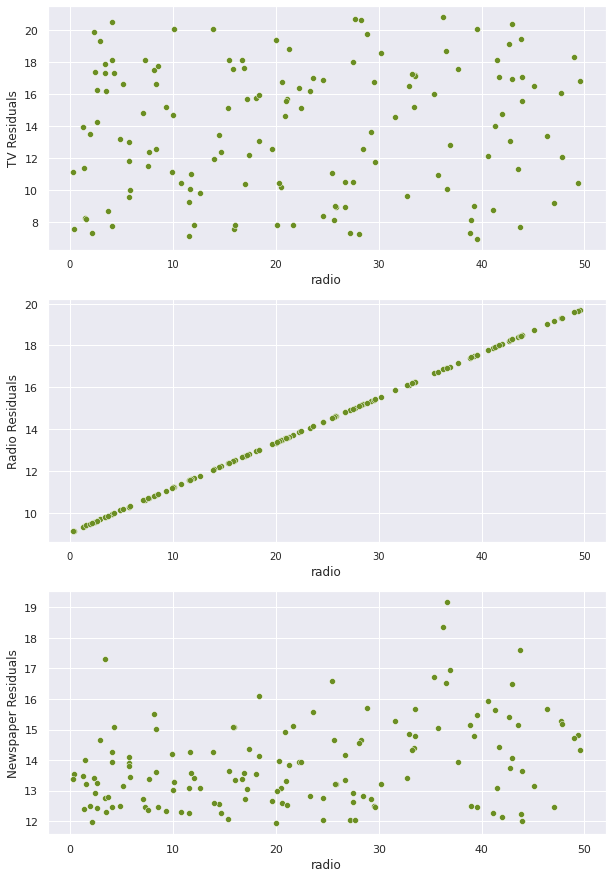

In [28]:
#Residuals vs Radio feature

x2 = train['radio']
fig = plt.figure(figsize=(10,4))

ax1 = plt.subplot(311)
ax1 = sns.scatterplot(x2, y_pred_tr_tv, color='olivedrab')
plt.ylabel("TV Residuals")
plt.setp(ax1.get_xticklabels(), fontsize=10)

ax2 = plt.subplot(312)
ax2 = sns.scatterplot(x2, y_pred_tr_radio, color='olivedrab')
plt.ylabel("Radio Residuals")
plt.setp(ax2.get_xticklabels(), fontsize=10)

ax3 = plt.subplot(313)
ax3 = sns.scatterplot(x2, y_pred_tr_news, color='olivedrab')
plt.ylabel("Newspaper Residuals")
plt.setp(ax2.get_xticklabels(), fontsize=10)

fig.subplots_adjust(top=3)
plt.show()

Text(0, 0.5, 'TV Residuals')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0, 0.5, 'Radio Residuals')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0, 0.5, 'Newspaper Residuals')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

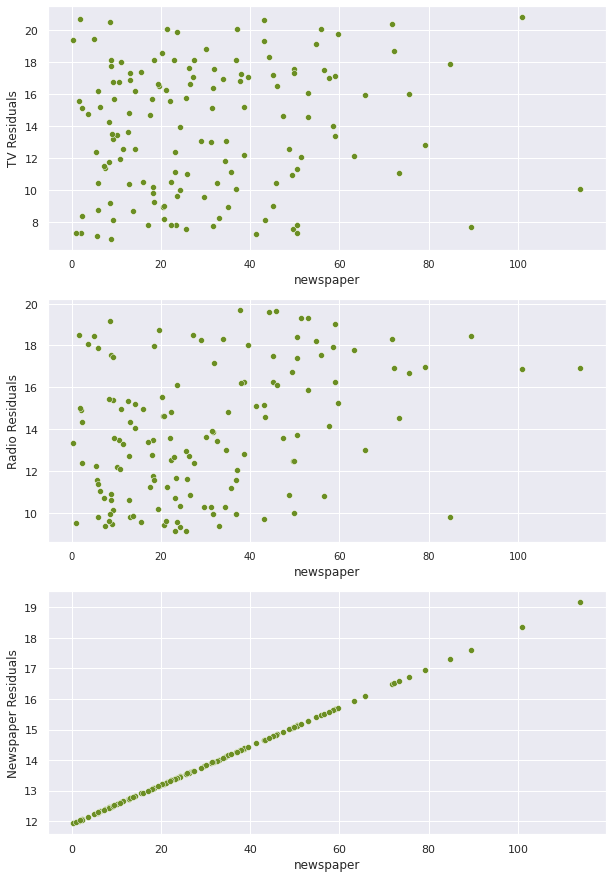

In [29]:
#Residuals vs Newspaper feature

x3 = train['newspaper']
fig = plt.figure(figsize=(10,4))

ax1 = plt.subplot(311)
ax1 = sns.scatterplot(x3, y_pred_tr_tv, color='olivedrab')
plt.ylabel("TV Residuals")
plt.setp(ax1.get_xticklabels(), fontsize=10)

ax2 = plt.subplot(312)
ax2 = sns.scatterplot(x3, y_pred_tr_radio, color='olivedrab')
plt.ylabel("Radio Residuals")
plt.setp(ax2.get_xticklabels(), fontsize=10)

ax3 = plt.subplot(313)
ax3 = sns.scatterplot(x3, y_pred_tr_news, color='olivedrab')
plt.ylabel("Newspaper Residuals")
plt.setp(ax2.get_xticklabels(), fontsize=10)

fig.subplots_adjust(top=3)
plt.show()

**Observations from the Residual vs Feature plots:**  


*   Plot is linear when same residual is plotted against the same feature.
*   Form the newspaper residual vs newspaper plot we can observe newspapers do not have a high budget. Plot points start decreasing as the values on the x-axis start increasing. 
*   TV * Newspaper and Newspaper * Radio  together can result in a good sale.  


### 4. Try a multiple linear regression

Next, fit a multiple linear regression to predict product sales, using
all three features to train a single model: TV ad budget, radio ad
budget, and newspaper ad budget.

Print the intercept and coefficients, and compute the MSE and R2 on the
training data, and MSE and R2 on the test data. Comment on the results.
Make sure to explain any differences between the coefficients of the
multiple regression model, and the coefficients of the three simple
linear regression models. If they are different, why?

**The code in the first part of this section is provided for you**.
However, you should add text cells in which you write your comments,
observations, and answers to the questions.

Also repeat the analysis of part (3) for this regression model. Use
training data for all of these items:

-   Plot predicted sales ($\hat{y}$) on the vertical axis, and actual
    sales ($y$) on the horizontal axis. Make sure both axes use the same
    scale. Comment on your observations. What would you expect this plot
    to look like for a model that explains the data well?
-   Compute the residuals ($y - \hat{y}$). What is the mean of the
    residuals? What *should* be the mean of the residuals for a fitted
    linear regression model? Explain your answer.
-   Plot the residuals ($y - \hat{y}$) on the vertical axis, and actual
    sales ($y$) on the horizontal axis. Comment on your observations. Is
    there a pattern in the residuals (and if so, what might it
    indicate), or do they appear to have no pattern with respect to
    actual sales?
-   For each of the three features, plot the residuals ($y - \hat{y}$)
    on the vertical axis, and the feature ($x$) on the horizontal axis.
    Make sure to clearly label each axis. Is there a pattern in the
    residuals (and if so, what might it indicate), or do they appear to
    have no pattern with respect to each of the three features?

**The code in the last part of this section is not provided for you**.
You will need to write code, in addition to the text cells in which you
write your comments, observations, and answers to the questions.

#### Fit a multiple linear regression

In [30]:
reg_multi = LinearRegression().fit(train[['TV', 'radio', 'newspaper']], train['sales'])

#### Look at coefficients

In [31]:
print("Coefficients (TV, radio, newspaper):", reg_multi.coef_)
print("Intercept: ", reg_multi.intercept_)

Coefficients (TV, radio, newspaper): [0.04428039 0.19474789 0.00056549]
Intercept:  2.964595577452206


#### Compute R2, MSE for multiple regression

In [32]:
y_pred_tr_multi = reg_multi.predict(train[['TV', 'radio', 'newspaper']])

r2_tr_multi  = metrics.r2_score(train['sales'], y_pred_tr_multi)
mse_tr_multi = metrics.mean_squared_error(train['sales'], y_pred_tr_multi)

print("Multiple regression R2:  ", r2_tr_multi)
print("Multiple regression MSE: ", mse_tr_multi)


Multiple regression R2:   0.9007504446781945
Multiple regression MSE:  2.6347505502251978


In [33]:
y_pred_ts_multi = reg_multi.predict(test[['TV', 'radio', 'newspaper']])

r2_ts_multi  = metrics.r2_score(test['sales'], y_pred_ts_multi)
mse_ts_multi = metrics.mean_squared_error(test['sales'], y_pred_ts_multi)

print("Multiple regression R2:  ", r2_ts_multi)
print("Multiple regression MSE: ", mse_ts_multi)


Multiple regression R2:   0.8853539446455017
Multiple regression MSE:  3.220459922555297


**Difference between the coefficents of the multiple regression model and three simple linear regression model:**  


There is no difference between the coefficents of TV(0.04 - 0.04 = 0) and Radio(0.21 - 0.19 = 0.02) for linear and multiple regression model. Which means these two features are trained quite well.

A noticable difference in the values of coefficents can be observed for Newspaper feature i.e 0.05 - (-0.004) = 0.054, this could be the result of poorly trained model, low R2 value(5%).  

Text(0.5, 1.0, 'Actual vs Predicted sales for all the features(Training set)')

Text(0.5, 0, 'Actual Sales $y _i$')

Text(0, 0.5, 'Predicted Sales $\\hat y _i$')

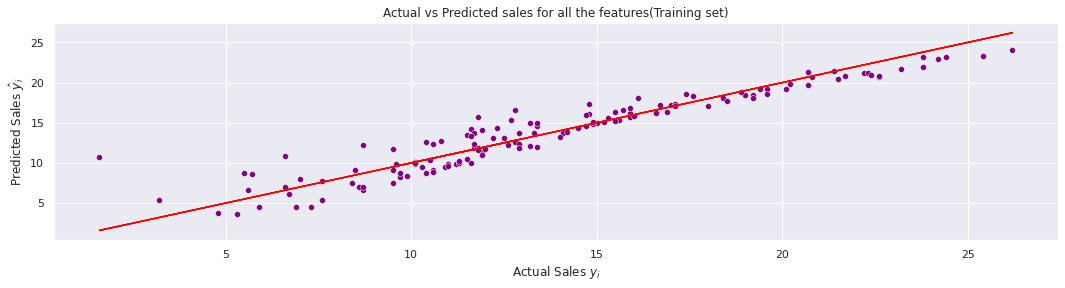

In [34]:
#Multiple regression - Predicted vs actual sales
#predicted sales vs actual sales for all 3 categories

fig = plt.figure(figsize=(18,4))


sns.scatterplot(train['sales'], y_pred_tr_multi, color = 'purple')
plt.plot(train['sales'], train['sales'], color = 'red')
plt.title('Actual vs Predicted sales for all the features(Training set)')
plt.xlabel('Actual Sales $y _i$')
plt.ylabel('Predicted Sales $\hat y _i$')

**Observations from the actual vs predicted graph :**


*   There is a positive linear relationship between actual and the predicted sales.
*   The model is doing quite a good job. 


For a data to do well I would expect predicted values to be equal to actual sales. 


In [35]:
#Compute residuals

residual_multi = y - y_pred_tr_multi
print("Residual Values: \n", residual_multi)
mean_multi = np.mean(residual_multi)
print("Mean Value: ", mean_multi, "\n")

Residual Values: 
 35     2.020940
142    0.721467
23    -1.073636
92     2.758202
32     0.525708
         ...   
85     0.888269
155    0.204995
169   -0.031213
98     0.245815
89     1.017868
Name: sales, Length: 140, dtype: float64
Mean Value:  2.0745310231567212e-15 



**Observations from residual values:**


For a fitted multiple linear regression model I would expect the sum of  the mean and the residuals to be equal to zero. 

Text(0.5, 1.0, 'Actual Sales vs Residual Values(Training set)')

Text(0.5, 0, 'Actual Sales $y _i$')

Text(0, 0.5, 'Residual $y _i$ - $\\hat y _i$')

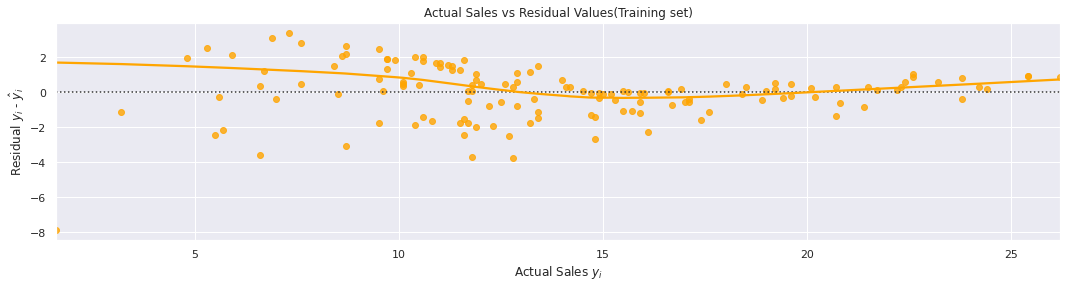

In [36]:
#Actual Sales vs Residual values plot 

fig = plt.figure(figsize=(18,4))

sns.residplot(x=train['sales'], y=residual_multi, lowess=True, color='orange')
plt.title('Actual Sales vs Residual Values(Training set)')
plt.xlabel('Actual Sales $y _i$')
plt.ylabel('Residual $y _i$ - $\hat y _i$')

**Observations from the Residual vs Actual Sales plot:**


*   There is a pattern present
*   A quadratic pattern can be observed. 
*   Linear regression is not okay
*   Varation is unequal across the range of explantory data.

Text(0, 0.5, 'Residual')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0, 0.5, 'Residual')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0, 0.5, 'Residual')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

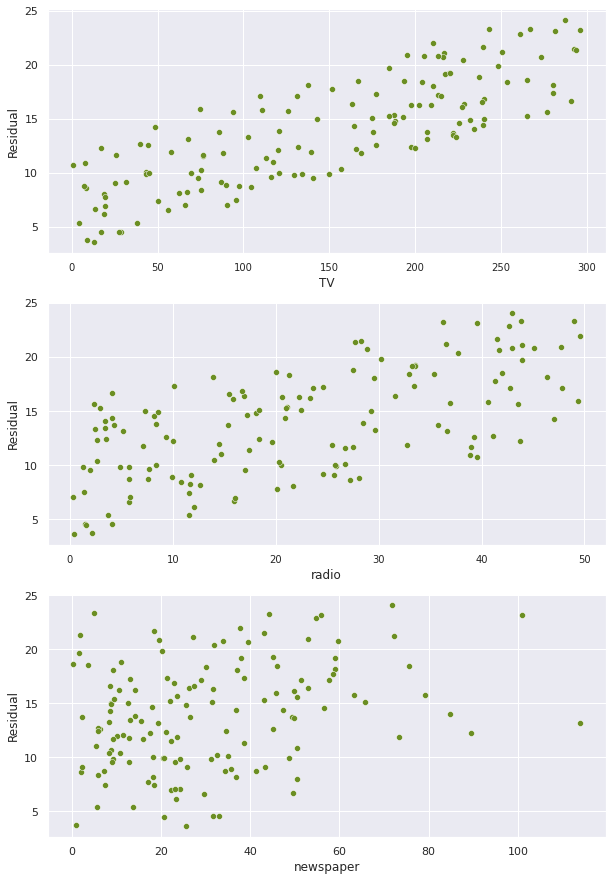

In [37]:
#Residual vs feature plot

fig = plt.figure(figsize=(10,4))

ax1 = plt.subplot(311)
ax1 = sns.scatterplot(x1, y_pred_tr_multi, color='olivedrab')
plt.ylabel("Residual")
plt.setp(ax1.get_xticklabels(), fontsize=10)

ax2 = plt.subplot(312)
ax2 = sns.scatterplot(x2, y_pred_tr_multi, color='olivedrab')
plt.ylabel("Residual")
plt.setp(ax2.get_xticklabels(), fontsize=10)

ax3 = plt.subplot(313)
ax3 = sns.scatterplot(x3, y_pred_tr_multi, color='olivedrab')
plt.ylabel("Residual")
plt.setp(ax2.get_xticklabels(), fontsize=10)

fig.subplots_adjust(top=3)
plt.show()

**Observations from the Residual vs Feature plot:**


Residual vs TV and Residual vs Radio plot :

*   There is a linear pattern present
*   System is biased

Residual vs Newspaper plot:

*   No pattern is present

### 5. Linear regression with interaction terms

Our multiple linear regression includes additive effects of all three
types of advertising media. However, it does not include *interaction*
effects, in which combining different types of advertising media
together results in a bigger boost in sales than just the additive
effect of the individual media. The pattern in the residuals plots from
parts (1) through (4) suggest that a model including an interaction
effect may explain sales data better than a model including additive
effects. Add four columns to your data frame:

-   `newspaper` $\times$ `radio`
-   `TV` $\times$ `radio`
-   `newspaper` $\times$ `TV`
-   `newspaper` $\times$ `radio` $\times$ `TV`

Then, train a linear regression model on all seven features: the three
types of ad budgets, and the four interaction effects. Repeat the
analysis of part (4) for the model including interaction effects.
Comment on the results. Are the interaction effects helpful for
explaining the effect of ads on product sales? Are there any patterns
evident in the residual plots that suggest further opportunities for
improving the model?

(If you think the results suggest further opportunities for improving
the model, you are welcome to try and to comment on the results!)

**The code in this section is not provided for you**. You will need to
write code, in addition to the text cells in which you write your
comments, observations, and answers to the questions.

In [38]:
tv_tr = train['TV']
radio_tr = train['radio']
newspaper_tr = train['newspaper']

#adding columns
multi_col = np.column_stack((tv_tr, radio_tr, newspaper_tr, 
                               newspaper_tr*radio_tr, tv_tr*radio_tr, newspaper_tr*tv_tr, 
                               newspaper_tr*radio_tr*tv_tr))

#training the model
reg_multi_col = LinearRegression().fit(multi_col, train['sales'])

In [39]:
print("Coefficients (TV, radio, newspaper, newspaper*radio, tv*radio, newspaper*tv, newspaper*radio*tv): \n", reg_multi_col.coef_)
print("Intercepts:", reg_multi_col.intercept_)

Coefficients (TV, radio, newspaper, newspaper*radio, tv*radio, newspaper*tv, newspaper*radio*tv): 
 [ 2.13500185e-02  2.01598176e-02  6.99167633e-03  3.05391513e-04
  1.14535965e-03 -5.09294812e-05 -1.56841967e-06]
Intercepts: 6.36447059142474


In [40]:
y_pred_tr_multi_col = reg_multi_col.predict(multi_col)

r2_tr_multi_col  = metrics.r2_score(train['sales'], y_pred_tr_multi_col)
mse_tr_multi_col = metrics.mean_squared_error(train['sales'], y_pred_tr_multi_col)

print("Multiple regression R2:  ", r2_tr_multi_col)
print("Multiple regression MSE: ", mse_tr_multi_col)


Multiple regression R2:   0.9646582968364665
Multiple regression MSE:  0.9382064388509909


**Plots**

Text(0.5, 1.0, 'Actual vs Predicted sales(Training set)')

Text(0.5, 0, 'Actual Sales $y _i$')

Text(0, 0.5, 'Predicted Sales $\\hat y _i$')

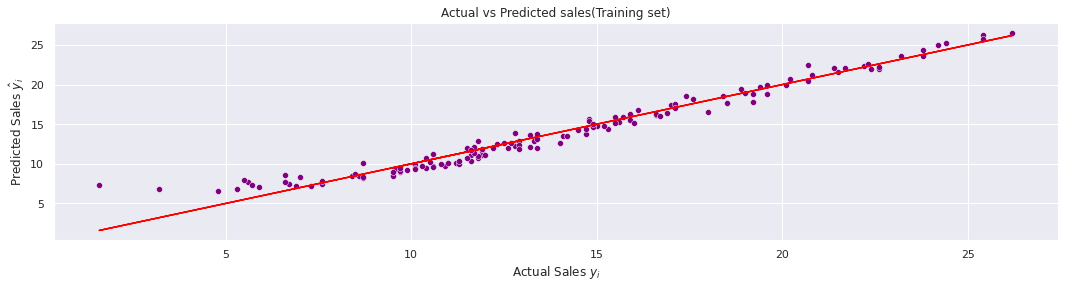

In [41]:
#Multiple regression - Predicted vs actual sales for 7 columns
#predicted sales vs actual sales 

fig = plt.figure(figsize=(18,4))

sns.scatterplot(train['sales'], y_pred_tr_multi_col, color = 'purple')
plt.plot(train['sales'], train['sales'], color = 'red')
plt.title('Actual vs Predicted sales(Training set)')
plt.xlabel('Actual Sales $y _i$')
plt.ylabel('Predicted Sales $\hat y _i$')

**Observations from Actual vs Predicted graph:**


*   Linear positive relationship is present.
*   For a well fitted multiple regression plot I would expect predicted values to be equal to actual values.
*   This plot fits perfectly with the line. 
*   Model has high goodness value.  


In [42]:
#Compute residuals

residual_multi_col = y - y_pred_tr_multi_col
print("Residual Values: \n", residual_multi_col)
mean_multi_col = np.mean(residual_multi_col)
print("Mean Value: ", mean_multi_col, "\n")

Residual Values: 
 35     0.893374
142    0.345640
23    -2.145179
92     0.049989
32     0.390204
         ...   
85    -0.430516
155    0.284314
169    0.111866
98     0.363481
89     1.061808
Name: sales, Length: 140, dtype: float64
Mean Value:  -9.452756038237047e-16 



**Observations from the residuals:**


For a perfect model, I would expect the sum of mean and all the residual values to be zero. This model has residuals but are small comparatively. 

The means residual for this model is small in comparison to previous 2 models.


Text(0.5, 1.0, 'Actual vs Residual sales(Training set)')

Text(0.5, 0, 'Actual Sales $y _i$')

Text(0, 0.5, 'Residual $y _i$ - $\\hat y _i$')

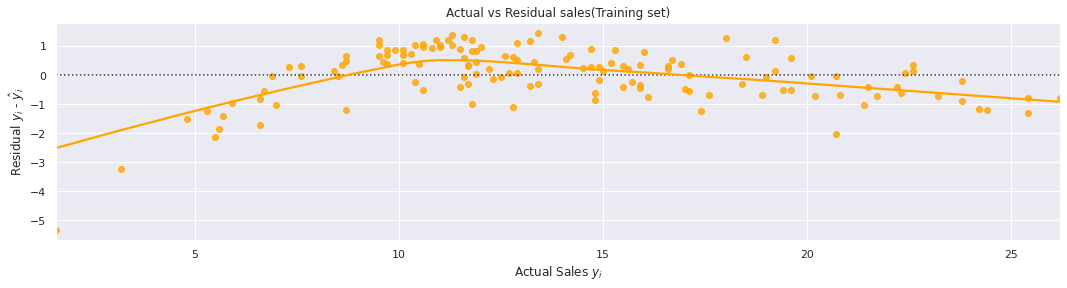

In [43]:
#Residual vs actual sales plot 

fig = plt.figure(figsize=(18,4))

sns.residplot(x=train['sales'], y=residual_multi_col, lowess=True, color='orange')
plt.title('Actual vs Residual sales(Training set)')
plt.xlabel('Actual Sales $y _i$')
plt.ylabel('Residual $y _i$ - $\hat y _i$')

**Observations from the Residual vs Actual sales plot:**


*   There is a pattern present
*   The system is biased
*   A quadratic pattern can be observed
*   Variation across the x-axis is changing
*   The variation is same across all values of explanatory data. 
*   Residual isn't high enough, Ranges from 0 to 1 for majority of the values.

Text(0.5, 1.0, 'Residual from the 7 columns VS TV feature')

Text(0, 0.5, 'Residual')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 1.0, 'Residual from the 7 columns VS Radio feature')

Text(0, 0.5, 'Residual')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 1.0, 'Residual from the 7 columns VS Newspaper feature')

Text(0, 0.5, 'Residual')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

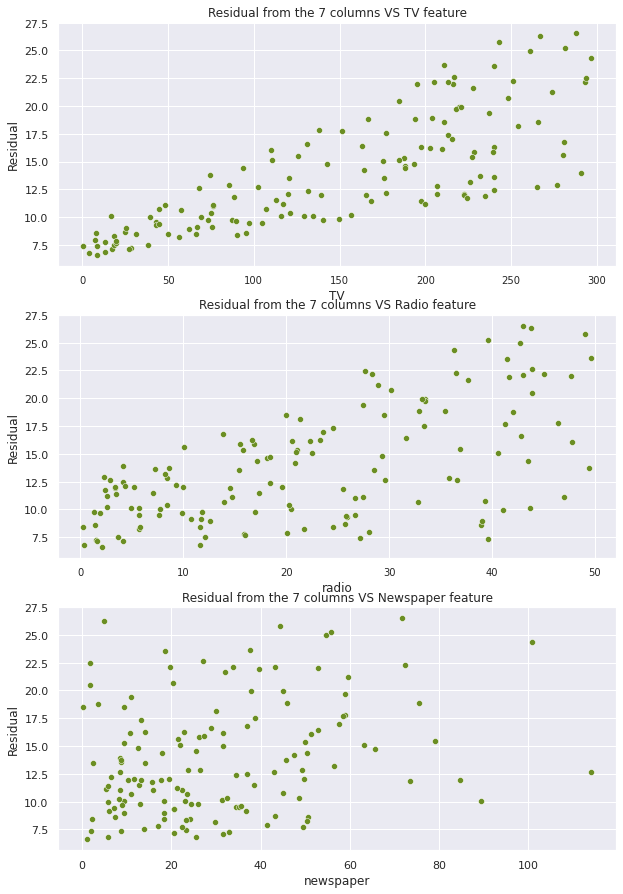

In [44]:
#Residual vs Feature plot

fig = plt.figure(figsize=(10,4))

ax1 = plt.subplot(311)
ax1 = sns.scatterplot(x1, y_pred_tr_multi_col, color='olivedrab')
plt.title("Residual from the 7 columns VS TV feature")
plt.ylabel("Residual")
plt.setp(ax1.get_xticklabels(), fontsize=10)

ax2 = plt.subplot(312)
ax2 = sns.scatterplot(x2, y_pred_tr_multi_col, color='olivedrab')
plt.title("Residual from the 7 columns VS Radio feature")
plt.ylabel("Residual")
plt.setp(ax2.get_xticklabels(), fontsize=10)

ax3 = plt.subplot(313)
ax3 = sns.scatterplot(x3, y_pred_tr_multi_col, color='olivedrab')
plt.title("Residual from the 7 columns VS Newspaper feature")
plt.ylabel("Residual")
plt.setp(ax2.get_xticklabels(), fontsize=10)

fig.subplots_adjust(top=3)
plt.show()

**Observations from the Residual vs Feature plots:**


Residual vs TV feature:

*   There is a pattern present
*   A linear pattern can be observed
*   Linear regression is not okay

Residual vs Radio feature:

*   There is pattern present
*   System is biased
*   Variation is unequal across the range of explanatory values

Residual vs Newspaper feature:

*   No pattern can be observed
*   The system in unbiased


Yes, the interaction effects are helpful for explaining the effect of ads on product sales. This model helps us understand that TV and Radio ads budget can produce high number of sales as they have positive linear pattern. 


These interaction effects have also improved the model goodness(R2=97%)
 